In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
dataset=pd.read_csv('lebanon_housing_prices_raw_for_eda.csv')

NameError: name 'pd' is not defined

In [ ]:
dataset.head()

NameError: name 'dataset' is not defined

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country Name             2200 non-null   object 
 1   District Name            1876 non-null   object 
 2   Area (sqm)               2080 non-null   float64
 3   Bedrooms                 2080 non-null   float64
 4   Bathrooms                2080 non-null   float64
 5   Property Age (Years)     2200 non-null   float64
 6   Distance to Beirut (km)  2200 non-null   float64
 7   Quality Score            2200 non-null   float64
 8   Price USD                2200 non-null   float64
dtypes: float64(7), object(2)
memory usage: 154.8+ KB


In [ ]:
## missing values
dataset[dataset.isnull().any(axis=1)]

,Country Name,District Name,Area (sqm),Bedrooms,Bathrooms,Property Age (Years),Distance to Beirut (km),Quality Score,Price USD
0,Lebanon,NaN,64.659629,-0.0,0.0,90.877796,19.909107,-0.390926,2411.341853
1,Lebanon,Bekaa,NaN,NaN,NaN,39.100338,9.232178,0.879775,98312.000495
3,Lebanon,NaN,128.306209,1.0,-0.0,0.456741,34.102791,0.102105,50801.157088
11,Lebanon,NaN,131.037992,3.0,2.0,56.939701,19.264841,3.710729,145681.020185
12,Lebanon,NaN,74.408556,1.0,-1.0,23.482584,34.039562,0.550424,86249.511347
...,...,...,...,...,...,...,...,...,...
2170,Lebanon,NaN,177.902933,5.0,3.0,4.141412,6.622179,4.282558,222682.772657
2182,Lebanon,NaN,132.929235,2.0,2.0,10.743436,11.489978,2.490047,76959.293747
2187,Lebanon,NaN,98.819702,1.0,0.0,5.967299,18.680203,0.900745,59058.487847
2188,Lebanon,NaN,83.829378,2.0,1.0,0.410794,36.835050,0.792336,67074.327566


In [ ]:
dataset.isnull().sum()

Country Name                 0
District Name              324
Area (sqm)                 120
Bedrooms                   120
Bathrooms                  120
Property Age (Years)         0
Distance to Beirut (km)      0
Quality Score                0
Price USD                    0
dtype: int64

In [ ]:
## Removing the null values
dataset=dataset.dropna().reset_index(drop=True)

In [ ]:
dataset.head()

,Country Name,District Name,Area (sqm),Bedrooms,Bathrooms,Property Age (Years),Distance to Beirut (km),Quality Score,Price USD
0,Lebanon,Bekaa,108.645645,0.0,-0.0,38.133877,53.607923,1.727560,-4667.465835
1,Lebanon,Bekaa,133.572428,1.0,0.0,1.477919,23.584768,-0.906120,110865.523358
2,Lebanon,Nabatieh,109.319399,4.0,3.0,1.204542,5.458761,3.510343,185202.397424
3,Lebanon,Nabatieh,176.844316,2.0,1.0,35.969828,34.078296,-0.456348,97599.154886
4,Lebanon,Mount Lebanon,13.031192,0.0,-1.0,1.953174,30.408654,0.839487,-30550.223805


In [ ]:
dataset = dataset[
    (dataset['Bedrooms'] > 0) &
    (dataset['Bathrooms'] > 0)
].reset_index(drop=True)


In [ ]:
dataset.head()

,Country Name,District Name,Area (sqm),Bedrooms,Bathrooms,Property Age (Years),Distance to Beirut (km),Quality Score,Price USD
0,Lebanon,Nabatieh,109.319399,4.0,3.0,1.204542,5.458761,3.510343,185202.397424
1,Lebanon,Nabatieh,176.844316,2.0,1.0,35.969828,34.078296,-0.456348,97599.154886
2,Lebanon,Beirut,119.991774,2.0,1.0,3.021949,12.421154,1.310854,191984.517568
3,Lebanon,Mount Lebanon,126.625672,2.0,1.0,23.568130,-2.432528,-0.758693,121432.173030
4,Lebanon,Beirut,87.952550,3.0,2.0,10.619258,36.150085,4.828681,135299.153732


In [ ]:
## fix spaces in columns names
dataset.columns=dataset.columns.str.strip()
dataset.columns

Index(['Country Name', 'District Name', 'Area (sqm)', 'Bedrooms', 'Bathrooms',
       'Property Age (Years)', 'Distance to Beirut (km)', 'Quality Score',
       'Price USD'],
      dtype='object')

In [ ]:
dataset.columns = (
    dataset.columns
    .str.strip()                         # remove leading/trailing spaces
    .str.lower()                         # lowercase
    .str.replace(' ', '_', regex=False)  # spaces → _
    .str.replace('(', '', regex=False)   # remove (
    .str.replace(')', '', regex=False)   # remove )
)


In [ ]:
dataset.head()

,country_name,district_name,area_sqm,bedrooms,bathrooms,property_age_years,distance_to_beirut_km,quality_score,price_usd
0,Lebanon,Nabatieh,109.319399,4.0,3.0,1.204542,5.458761,3.510343,185202.397424
1,Lebanon,Nabatieh,176.844316,2.0,1.0,35.969828,34.078296,-0.456348,97599.154886
2,Lebanon,Beirut,119.991774,2.0,1.0,3.021949,12.421154,1.310854,191984.517568
3,Lebanon,Mount Lebanon,126.625672,2.0,1.0,23.568130,-2.432528,-0.758693,121432.173030
4,Lebanon,Beirut,87.952550,3.0,2.0,10.619258,36.150085,4.828681,135299.153732


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371 entries, 0 to 1370
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country_name           1371 non-null   object 
 1   district_name          1371 non-null   object 
 2   area_sqm               1371 non-null   float64
 3   bedrooms               1371 non-null   float64
 4   bathrooms              1371 non-null   float64
 5   property_age_years     1371 non-null   float64
 6   distance_to_beirut_km  1371 non-null   float64
 7   quality_score          1371 non-null   float64
 8   price_usd              1371 non-null   float64
dtypes: float64(7), object(2)
memory usage: 96.5+ KB


In [ ]:
dataset['bedrooms'] = dataset['bedrooms'].round()
dataset['bathrooms'] = dataset['bathrooms'].round()
dataset['property_age_years'] = dataset['property_age_years'].round()


In [ ]:
dataset['bedrooms'] = dataset['bedrooms'].astype(int)
dataset['bathrooms'] = dataset['bathrooms'].astype(int)
dataset['property_age_years'] = dataset['property_age_years'].astype(int)


In [ ]:
dataset['price_usd'] = dataset['price_usd'].round().astype(int)


In [ ]:
dataset.head()

,country_name,district_name,area_sqm,bedrooms,bathrooms,property_age_years,distance_to_beirut_km,quality_score,price_usd
0,Lebanon,Nabatieh,109.319399,4,3,1,5.458761,3.510343,185202
1,Lebanon,Nabatieh,176.844316,2,1,36,34.078296,-0.456348,97599
2,Lebanon,Beirut,119.991774,2,1,3,12.421154,1.310854,191985
3,Lebanon,Mount Lebanon,126.625672,2,1,24,-2.432528,-0.758693,121432
4,Lebanon,Beirut,87.952550,3,2,11,36.150085,4.828681,135299


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371 entries, 0 to 1370
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country_name           1371 non-null   object 
 1   district_name          1371 non-null   object 
 2   area_sqm               1371 non-null   float64
 3   bedrooms               1371 non-null   int64  
 4   bathrooms              1371 non-null   int64  
 5   property_age_years     1371 non-null   int64  
 6   distance_to_beirut_km  1371 non-null   float64
 7   quality_score          1371 non-null   float64
 8   price_usd              1371 non-null   int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 96.5+ KB


In [ ]:
int_columns = [
    'bedrooms',
    'bathrooms',
    'property_age_years'
]

for col in int_columns:
    dataset[col] = dataset[col].round().astype(int)


In [ ]:
dataset.head()

,country_name,district_name,area_sqm,bedrooms,bathrooms,property_age_years,distance_to_beirut_km,quality_score,price_usd
0,Lebanon,Nabatieh,109.319399,4,3,1,5.458761,3.510343,185202
1,Lebanon,Nabatieh,176.844316,2,1,36,34.078296,-0.456348,97599
2,Lebanon,Beirut,119.991774,2,1,3,12.421154,1.310854,191985
3,Lebanon,Mount Lebanon,126.625672,2,1,24,-2.432528,-0.758693,121432
4,Lebanon,Beirut,87.952550,3,2,11,36.150085,4.828681,135299


In [ ]:
dataset['price_usd'] = dataset['price_usd'].round().astype(int)


In [ ]:
numeric_cols = dataset.select_dtypes(include=['float64', 'int64']).columns
numeric_cols


Index(['area_sqm', 'bedrooms', 'bathrooms', 'property_age_years',
       'distance_to_beirut_km', 'quality_score', 'price_usd'],
      dtype='object')

In [ ]:
dataset[numeric_cols] = dataset[numeric_cols].round(2)


In [ ]:
dataset.head()


,country_name,district_name,area_sqm,bedrooms,bathrooms,property_age_years,distance_to_beirut_km,quality_score,price_usd
0,Lebanon,Nabatieh,109.32,4,3,1,5.46,3.51,185202
1,Lebanon,Nabatieh,176.84,2,1,36,34.08,-0.46,97599
2,Lebanon,Beirut,119.99,2,1,3,12.42,1.31,191985
3,Lebanon,Mount Lebanon,126.63,2,1,24,-2.43,-0.76,121432
4,Lebanon,Beirut,87.95,3,2,11,36.15,4.83,135299


In [ ]:
dataset.to_csv('Lebanon_housingPrices_cleaned_dataset.csv',index=False)

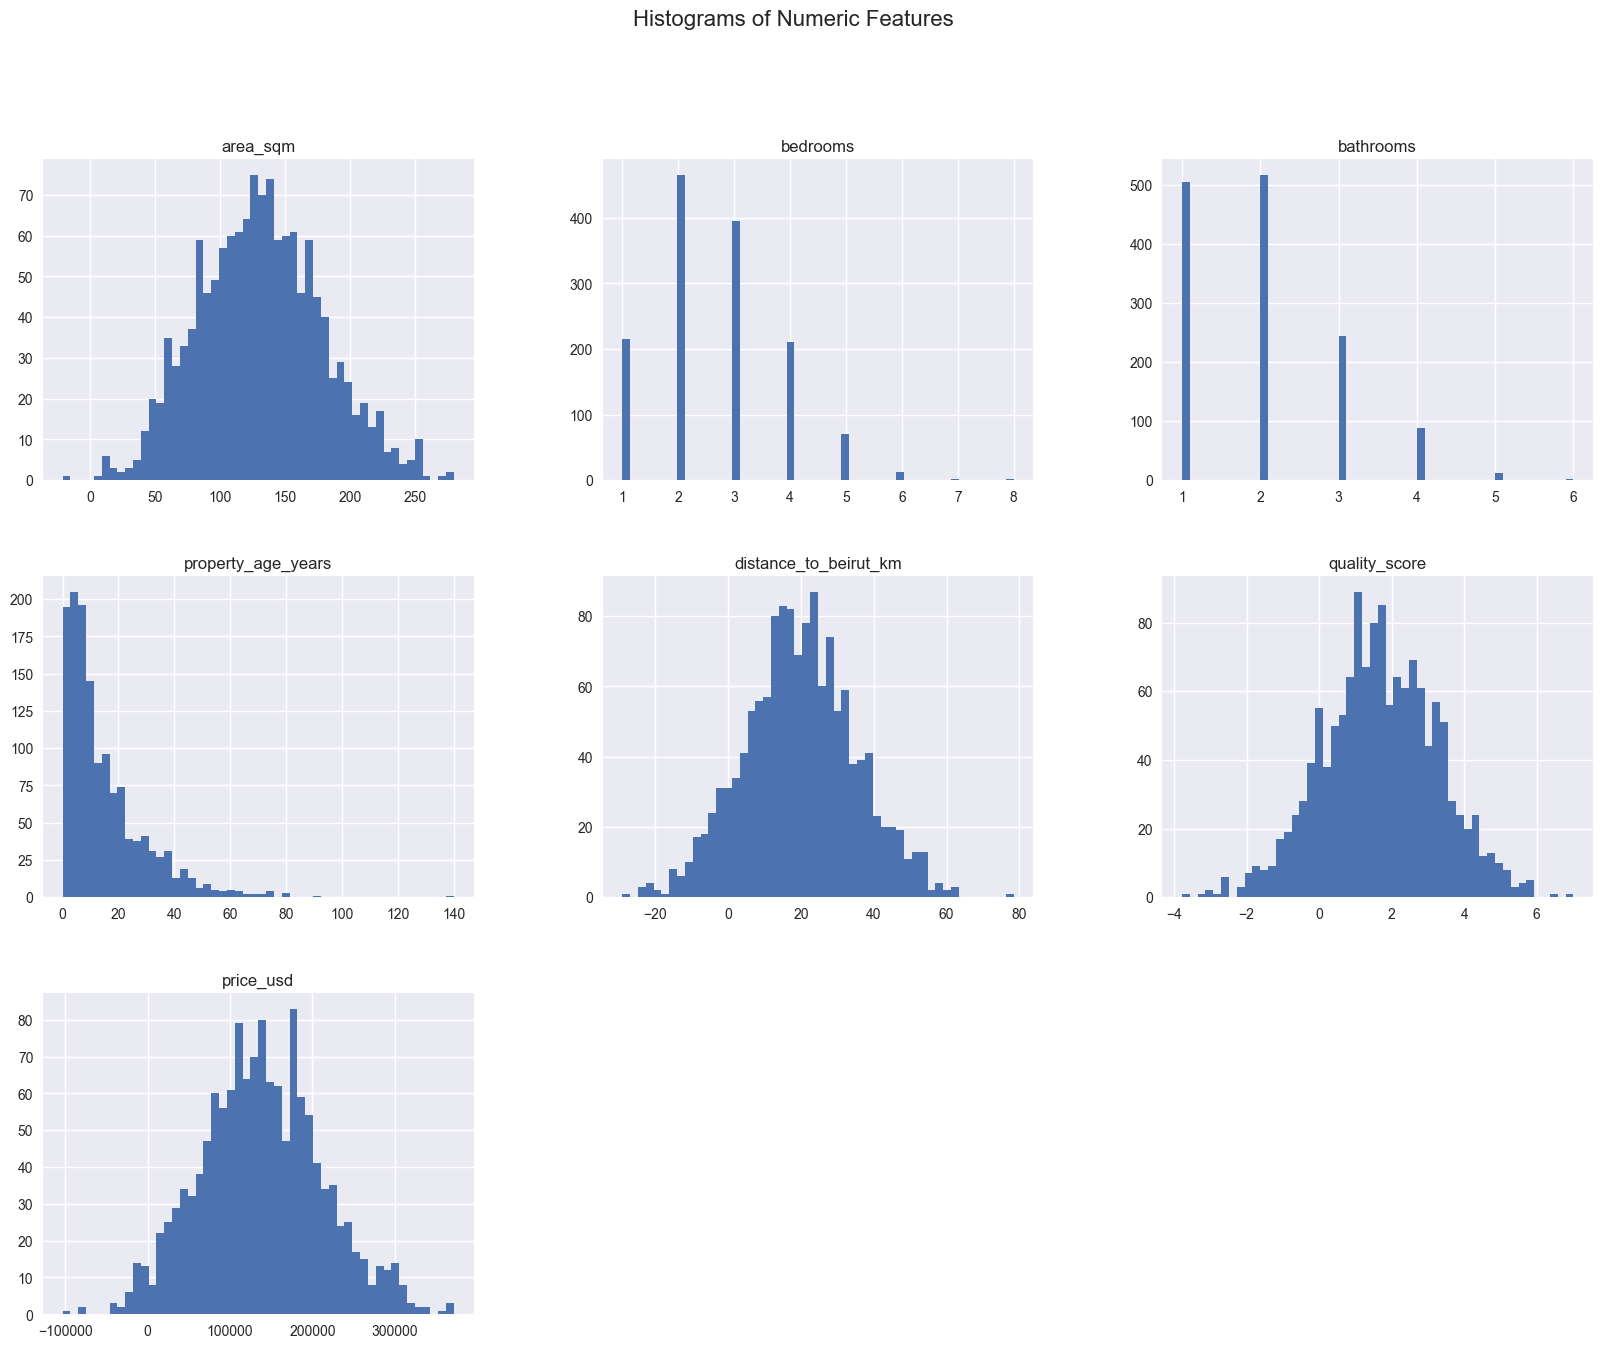

In [ ]:
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8')

dataset.hist(bins=50, figsize=(20,15))
plt.suptitle("Histograms of Numeric Features", fontsize=16)
plt.show()


In [ ]:
## Percentage for Pie Chart
percentage=dataset['district_name'].value_counts(normalize=True)*100

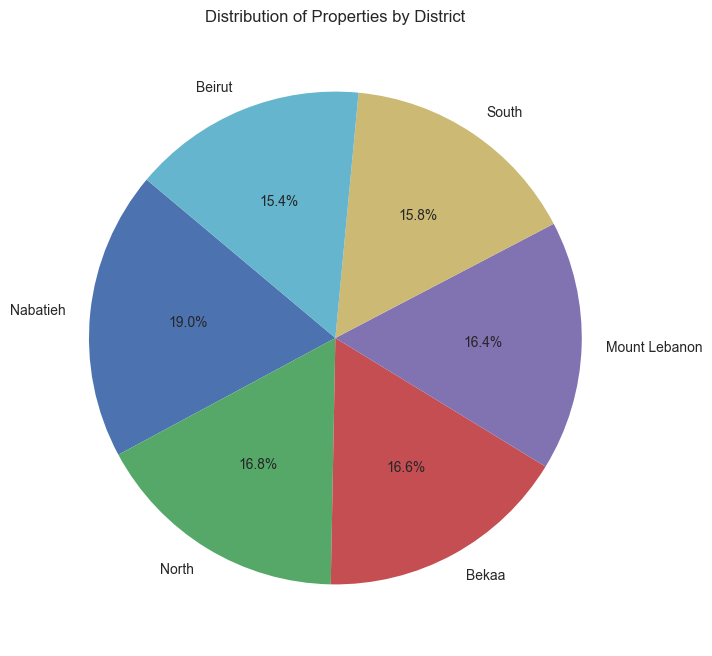

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
plt.pie(
    percentage.values,
    labels=percentage.index,
    autopct='%1.1f%%',
    startangle=140
)
plt.title("Distribution of Properties by District")
plt.show()


In [ ]:
numeric_df = dataset.select_dtypes(include=['int64', 'float64'])
numeric_df.head()


,area_sqm,bedrooms,bathrooms,property_age_years,distance_to_beirut_km,quality_score,price_usd
0,109.32,4,3,1,5.46,3.51,185202
1,176.84,2,1,36,34.08,-0.46,97599
2,119.99,2,1,3,12.42,1.31,191985
3,126.63,2,1,24,-2.43,-0.76,121432
4,87.95,3,2,11,36.15,4.83,135299


In [ ]:
corr_matrix = numeric_df.corr()
corr_matrix


,area_sqm,bedrooms,bathrooms,property_age_years,distance_to_beirut_km,quality_score,price_usd
area_sqm,1.000000,0.598063,0.398933,0.039903,0.022806,0.213136,0.732089
bedrooms,0.598063,1.000000,0.676795,0.018396,-0.016644,0.373701,0.646242
bathrooms,0.398933,0.676795,1.000000,-0.003625,0.011733,0.376218,0.455052
property_age_years,0.039903,0.018396,-0.003625,1.000000,-0.025672,-0.002078,-0.113981
distance_to_beirut_km,0.022806,-0.016644,0.011733,-0.025672,1.000000,0.012493,-0.207048
quality_score,0.213136,0.373701,0.376218,-0.002078,0.012493,1.000000,0.418178
price_usd,0.732089,0.646242,0.455052,-0.113981,-0.207048,0.418178,1.000000


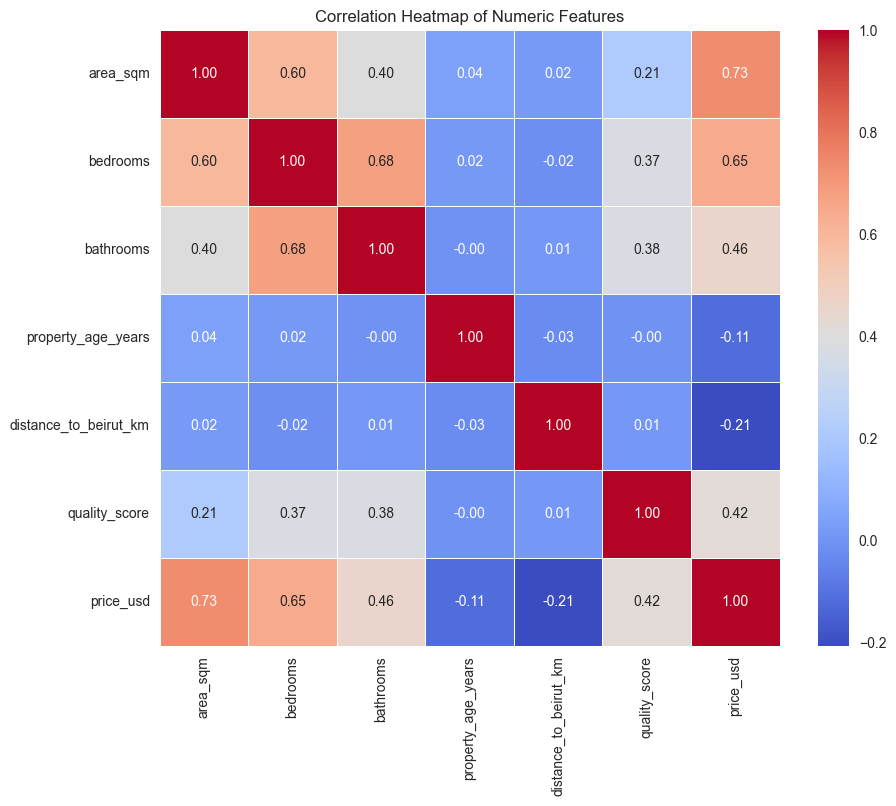

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5
)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


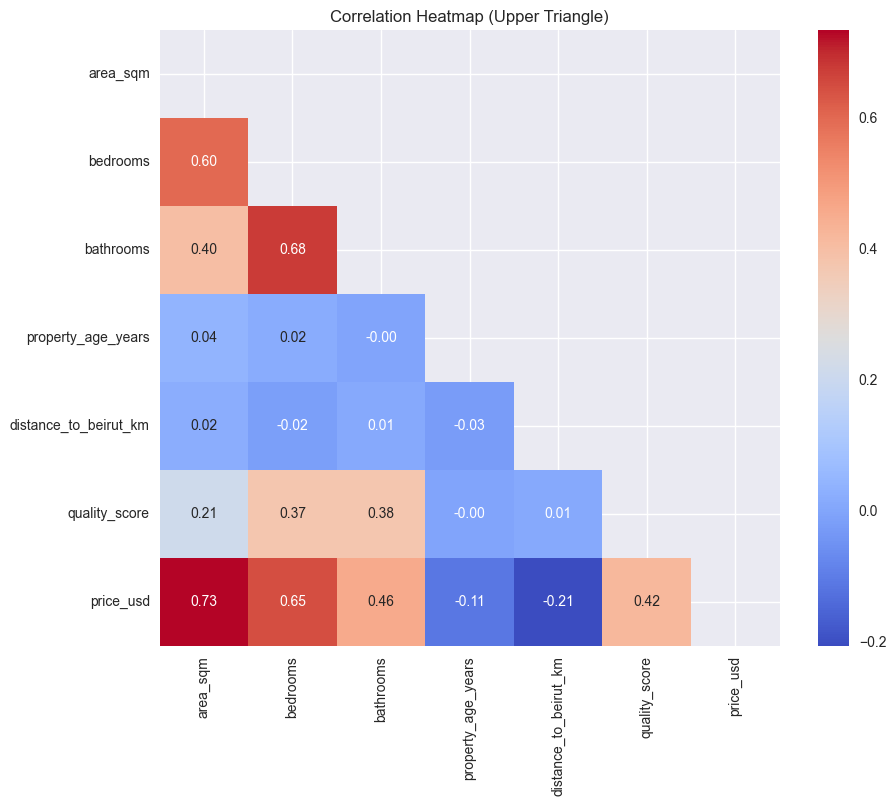

In [ ]:
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(10,8))
sns.heatmap(
    corr_matrix,
    mask=mask,
    annot=True,
    fmt=".2f",
    cmap="coolwarm"
)
plt.title("Correlation Heatmap (Upper Triangle)")
plt.show()
